# Split data from main dataset json

Fold 0:
Train has 27 items
Test has 14 items


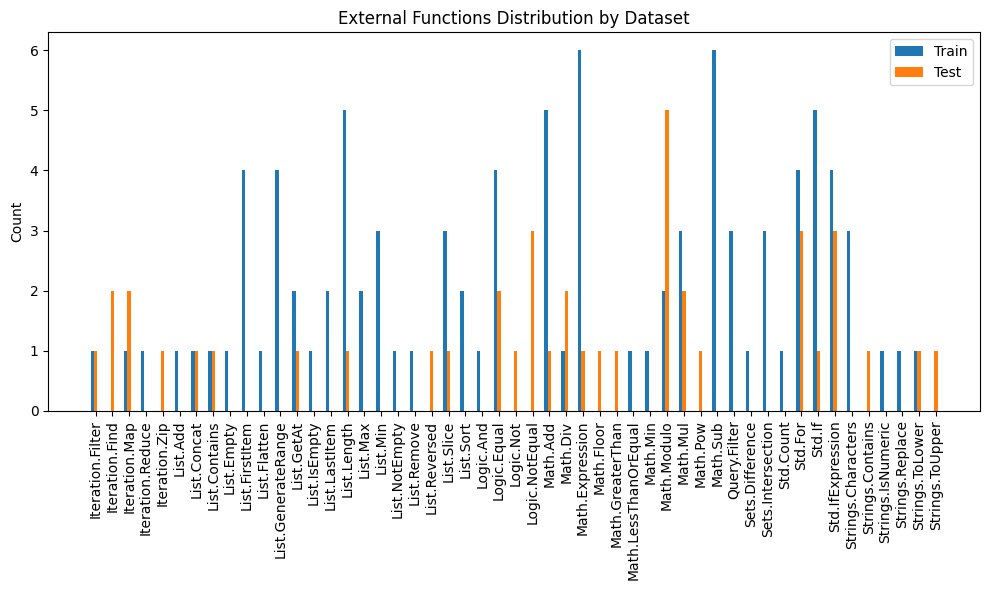

Fold 1:
Train has 27 items
Test has 14 items


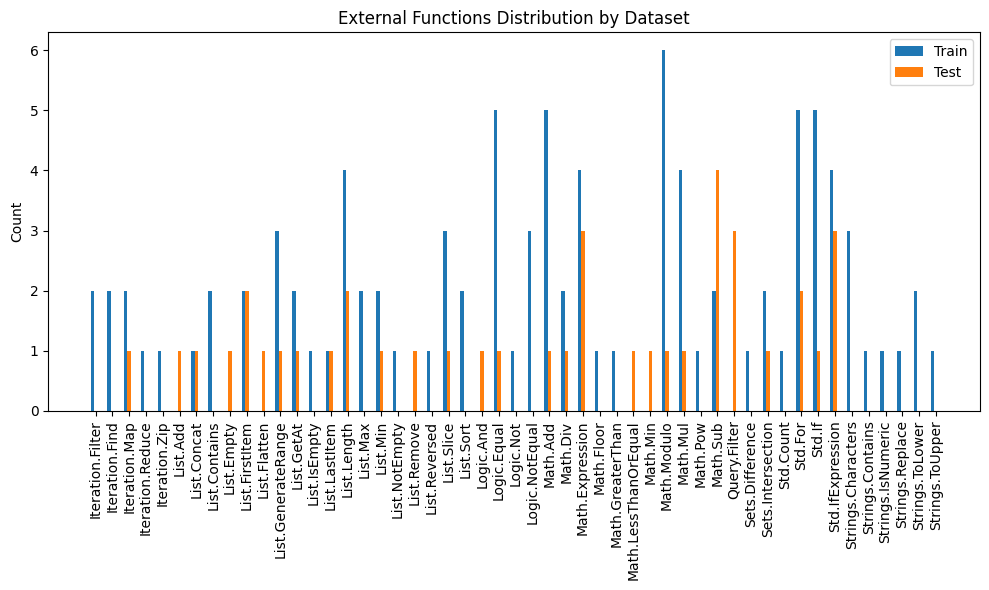

Fold 2:
Train has 28 items
Test has 13 items


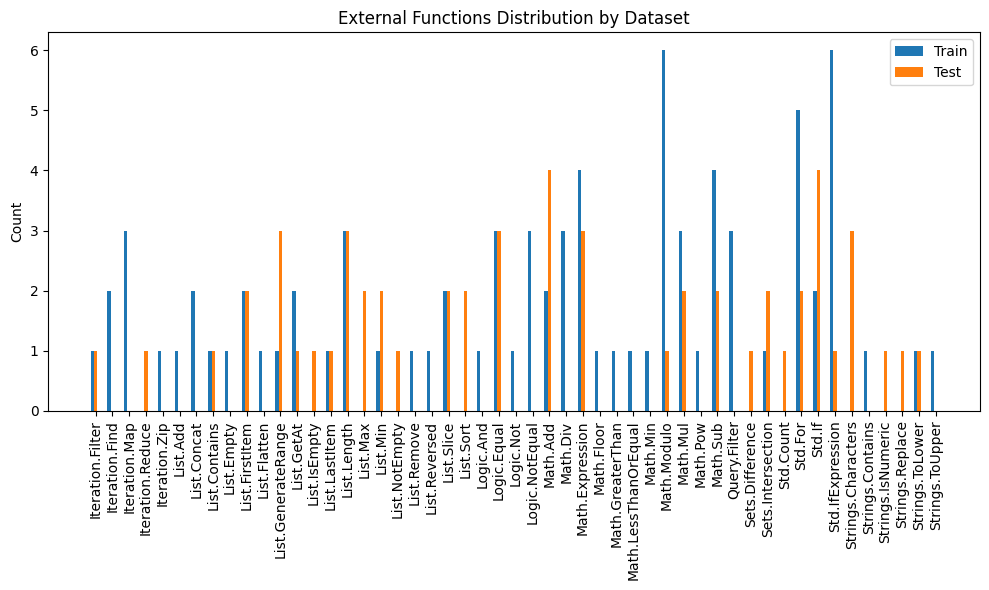

In [6]:

import sys
sys.path.append('../../')  # Add the path to the my_packages module
from my_packages.utils.file_utils import read_dataset_to_json
from my_packages.data_processing.split_dataset import multi_stratified_split
from my_packages.data_processing.attributes_processing import used_functions_from_dataset
from my_packages.analysis.analyze_datasets import analyze_functions_distribution, analyze_instance_distribution, analyze_visual_node_types_distribution

folds = 3
for k in range(folds):
    train_folder = f'../../data/MBPP_Midio_50/splits/{folds}_fold/train_dataset_{k}.json'
    test_folder = f'../../data/MBPP_Midio_50/splits/{folds}_fold/test_dataset_{k}.json'
    train = read_dataset_to_json(train_folder)
    test = read_dataset_to_json(test_folder)

    # Convert any comma-separated "external_functions" in each record to a list
    for entry in train:
        if isinstance(entry.get("external_functions", None), str):
            entry["external_functions"] = [x.strip() for x in entry["external_functions"].split(",")]

    for entry in test:
        if isinstance(entry.get("external_functions", None), str):
            entry["external_functions"] = [x.strip() for x in entry["external_functions"].split(",")]

    print(f"Fold {k}:")
    print(f"Train has {len(train)} items")
    print(f"Test has {len(test)} items")

    analyze_functions_distribution(train, None, test)

# main_dataset_folder = '../../data/MBPP_Midio_50/MBPP_Midio_50.json'
# dataset = read_dataset_to_json(main_dataset_folder)

# # train, val, test = multi_stratified_split(
# #     dataset=dataset, 
# #     write_to_file=False, 
# #     eval_size=0.4, 
# #     seed=58
# # )

# # print(f"Train: {len(train)}")
# # print(f"Unique External function in train: {len(used_functions_from_dataset(train))}")
# # print(f"Val: {len(val)}")
# # print(f"Unique External function in val: {len(used_functions_from_dataset(val))}")
# # print(f"Test: {len(test)}")
# # print(f"Unique External functions in test: {len(used_functions_from_dataset(test))}")
# # Analyze distribution across train / val / tes
# analyze_functions_distribution(train, val, test)
# analyze_instance_distribution(train, val, test)
# analyze_visual_node_types_distribution(train, val, test) 


# Upload to Langsmith

## Node prediction

In [2]:

# import datetime
# from langsmith import Client, schemas
# from my_packages.prompting.few_shot import transform_node_data
# from dotenv import load_dotenv

# load_dotenv("../../.env")

# train_data = transform_node_data(train)
# val_data = transform_node_data(val)
# test_data = transform_node_data(test)

# data_splits = {
#     "train": train_data, 
#     "validation": val_data,
#     "test": test_data
# }

# langsmith = Client()
# langsmith_dataset_name = "Node prediction"

# if langsmith.has_dataset(dataset_name=langsmith_dataset_name):
#     langsmith_dataset=langsmith.read_dataset(dataset_name=langsmith_dataset_name)
#     print("Existing dataset found.")
#     print("Deleting existing dataset.")
#     examples = langsmith.list_examples(
#         dataset_name=langsmith_dataset_name,
#         splits=["train", "validation", "test"],
#         metadata={"task_id": "1"},
#         limit=5
#     )
#     for e in examples:
#         print(e.inputs)

#     input_str = input("Do you want to delete the existing dataset? (y/n): ")
#     if input_str.lower() == "y":
#         langsmith.delete_dataset(dataset_name=langsmith_dataset_name)
#         print("Existing dataset deleted.")
#     else:
#         print("Existing dataset not deleted.")
    
# else:
    
#     langsmith_dataset = langsmith.create_dataset(
#         dataset_name=langsmith_dataset_name, 
#         description="Tasks and responses for node prediction",
#         data_type=schemas.DataType.kv,
#     )
#     langsmith.update_dataset_tag(
#         dataset_name=langsmith_dataset_name,
#         as_of=datetime.datetime.now(), 
#         tag="dev"
#     )

#     print("New dataset created.")

#     # Upload the data to langsmith
#     for split_name, dataset in data_splits.items():
#         langsmith.create_examples(
#             inputs=[{"task": sample["task"]} for sample in dataset],
#             outputs=[{"response": sample["response"]} for sample in dataset],
#             metadata=[{
#                 "task_id": sample["task_id"], 
#                 "MBPP_task_id": sample["MBPP_task_id"],
#                 "external_functions": sample["external_functions"],
#                 }
#                 for sample in dataset
#             ],
#             splits=[split_name for _ in dataset],
#             dataset_name=langsmith_dataset_name,
#         )

## Code prediction

In [ ]:

# import datetime
# from langsmith import Client, schemas
# from my_packages.prompting.few_shot import transform_code_data
# from dotenv import load_dotenv

# load_dotenv("../../.env")
# print(train[0])
# train_data = transform_code_data(train)
# val_data = transform_code_data(val)
# test_data = transform_code_data(test)

# data_splits = {
#     "train": train_data, 
#     "validation": val_data,
#     "test": test_data
# }

# langsmith = Client()
# langsmith_dataset_name = "Code prediction V2"

# if langsmith.has_dataset(dataset_name=langsmith_dataset_name):
#     langsmith_dataset=langsmith.read_dataset(dataset_name=langsmith_dataset_name)
#     print("Existing dataset found.")
#     print("Deleting existing dataset.")

#     input_str = input("Do you want to delete the existing dataset? (y/n): ")
#     if input_str.lower() == "y":
#         langsmith.delete_dataset(dataset_name=langsmith_dataset_name)
#         print("Existing dataset deleted.")
#     else:
#         print("Existing dataset not deleted.")
    
# else:
    
#     langsmith_dataset = langsmith.create_dataset(
#         dataset_name=langsmith_dataset_name, 
#         description="Tasks and responses for code prediction",
#         data_type=schemas.DataType.kv,
#     )
#     langsmith.update_dataset_tag(
#         dataset_name=langsmith_dataset_name,
#         as_of=datetime.datetime.now(), 
#         tag="dev"
#     )

#     print("New dataset created.")

#     # Upload the data to langsmith
#     for split_name, dataset in data_splits.items():
#         langsmith.create_examples(
#             inputs=[{"task": sample["task"], "function_signature": sample["function_signature"]} for sample in dataset],
#             outputs=[{"response": sample["response"]} for sample in dataset],
#             metadata=[{
#                 "task_id": sample["task_id"], 
#                 "MBPP_task_id": sample["MBPP_task_id"],
#                 "external_functions": sample["external_functions"],
#                 "testing": {
#                     "function_signature": sample["function_signature"],
#                     "tests": sample["tests"]
#                 }
#             }
#             for sample in dataset
#             ],
#             splits=[split_name for _ in dataset],
#             dataset_name=langsmith_dataset_name,
#         )

{'prompts': ['Create a function to find the first repeated character in a given string.', "The created user-defined function 'first_repeated_char' should then be tested inside a seperate module called tests, within the main module. Since the user-defined function uses input and ouput triggers, the flow of execution is sent between the created function and assert nodes, using their input and output triggers."], 'task_id': 23, 'specification': {'function_signature': 'func(doc: "finds the first repeated character in a given string.") first_repeated_char {\n\tin(x: -20, y: -110, name: "execute") trigger() execute_97d5d5\n\tin(x: -216, y: 83, name: "string") property(String) string_71a657\n\tout(x: 1545, y: 186, name: "continue") trigger() continue_1914e0\n\tout(x: 904, y: 359, name: "char") property(Any) char_f2523c\n}', 'preconditions': '- There are no preconditions, the method will always work. Strings and sequences are always not null.', 'postconditions': '- If returns char, then return